In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import seaborn as sns

In [15]:
data_frame = pd.read_csv('./Mall_Customers.csv',index_col = 'CustomerID')


In [16]:
data_frame.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [17]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [18]:
data_frame.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [19]:
data_frame.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [46]:
X = data_frame.iloc[:,[2,3]].values

In [47]:
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


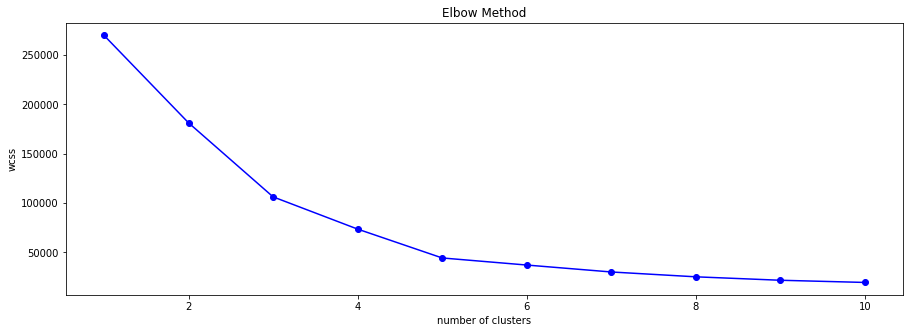

In [48]:
plt.figure(figsize =(15,5))
#sns.lineplot(range(1,11), wcss, color ='blue')
plt.title("Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.plot(range(1,11),wcss,'-bo')
plt.show()

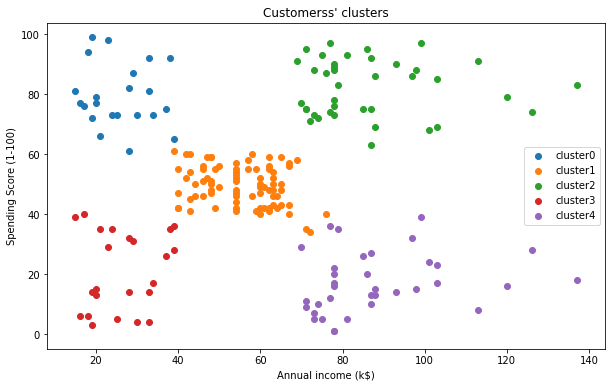

In [52]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',random_state = 42)
y_pred = kmeans.fit_predict(X)
plt.figure(figsize =(10,6))
for i in range(5):
    plt.scatter(X[y_pred==i,0],X[y_pred==i,1],label= 'cluster'+str(i))
    plt.legend()
plt.grid(False)
plt.title("Customerss' clusters")
plt.xlabel("Annual income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [50]:
X[y_pred==1,0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64)